## BOOTSTRAPPING : UNE METHODE DE REECHANTIONNAGE

In [141]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')  # le style ggplot est un paquege de R pour affiné les graphique

# ?pd.pivot_table

pour ullustrer la technique de bootstrapping, nous utiliserons les données "dowjones" du celebre jeu de données seaborn

In [143]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [144]:
dowjones_df = sns.load_dataset('dowjones')
dowjones_df

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


In [145]:
dowjones_df['Date'] = pd.to_datetime(dowjones_df['Date'],format='%Y-%m-%d')

In [146]:
dowjones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


In [147]:
dowjones_df = dowjones_df.loc[(dowjones_df['Date'] > "1956-03-01")]

# j'ai fais un .Loc pour diminuer le nombre des années pour mieux poursuivre mon travail plus bas

In [148]:
dowjones_df

# c'est mon dataframe originelle maintenant

,Date,Price
496,1956-04-01,511.04
497,1956-05-01,495.20
498,1956-06-01,485.33
499,1956-07-01,509.76
500,1956-08-01,511.69
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


In [149]:
dowjones_df = dowjones_df.set_index("Date")

In [150]:
dowjones_df.sort_values('Date')

,Price
Date,
1956-04-01,511.04
1956-05-01,495.20
1956-06-01,485.33
1956-07-01,509.76
1956-08-01,511.69
...,...
1968-08-01,883.72
1968-09-01,922.80
1968-10-01,955.47


In [151]:
dowjones_df.describe()

,Price
count,153.000000
mean,709.005229
std,159.699570
min,436.730000
25%,592.290000
50%,700.750000
75%,868.660000
max,985.930000


## BOOTSTRAPPING : definition

- méthodes de rééchantillonnage - concept de la Simulation statistique :
- applications dans plusieurs domaines.

Il existe plusieurs types de méthodes de rééchantillonnage.

La méthode Bootstrapping est le type de méthode de rééchantillonnage le plus utilisé. Ici l'échantillonnage de l'ensemble des données est fait à plusieurs reprises mais avec remise.

On répète plusieurs fois la simulation afin d'obtenir un grand nombre de statistiques récapitulatives à partir de jeux de données rééchantillonés encore appelés échantillons bootstrap.

Une réplique bootstrap est la valeur de la statistique récapitulative calculée à partir de l'échantilion bootstrap.

## Création et visualisation d'echantillons Bootstrap

In [152]:
# un echantillon bootstrap de la dataframe

boots_sample = np.random.choice(dowjones_df['Price'], size = len(dowjones_df))
boots_sample

array([679.75, 955.47, 912.46, 598.1 , 650.01, 485.33, 609.54, 511.69,
       483.8 , 511.69, 672.1 , 625.83, 690.66, 847.2 , 479.34, 866.73,
       863.55, 907.71, 507.55, 443.38, 985.93, 485.42, 597.02, 806.55,
       714.15, 865.43, 927.5 , 887.2 , 718.64, 471.79, 488.27, 711.95,
       793.03, 495.2 , 888.51, 926.43, 778.1 , 624.88, 581.78, 720.84,
       800.86, 865.43, 445.68, 817.55, 624.88, 500.83, 700.75, 707.12,
       724.74, 436.73, 743.24, 907.71, 884.77, 953.31, 624.47, 670.56,
       738.52, 630.8 , 631.51, 592.29, 738.52, 834.76, 865.43, 985.93,
       964.12, 743.24, 460.04, 714.21, 444.16, 905.32, 485.33, 866.73,
       635.47, 711.95, 747.52, 905.22, 646.43, 609.54, 964.12, 800.86,
       887.2 , 834.76, 912.46, 436.73, 466.84, 830.56, 436.73, 436.94,
       883.72, 628.82, 500.83, 460.04, 566.43, 646.43, 488.27, 637.34,
       646.43, 714.15, 759.94, 977.15, 665.39, 670.56, 672.1 , 847.2 ,
       601.14, 830.56, 509.76, 637.34, 887.7 , 660.58, 747.52, 912.46,
      

In [153]:
# Moyenne de l'echantillon boostrap

np.mean(boots_sample)

# la moyenne doit etre plus proche de la moyenne de notre dataframe original

699.4424836601308

In [154]:
# Ecart-type de l'echantillon boostrap

np.std(boots_sample)

# l'Ecart-type doit etre plus proche de l'Ecart-type de notre dataframe original

162.46384662594352

In [155]:
# Rappel de la fonction de calcul de la fonction de repartition empirique

def fre(data):           
    
    # Axes des abscisses
    x = np.sort(data)
    
    # Axes des ordonnées
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x, y

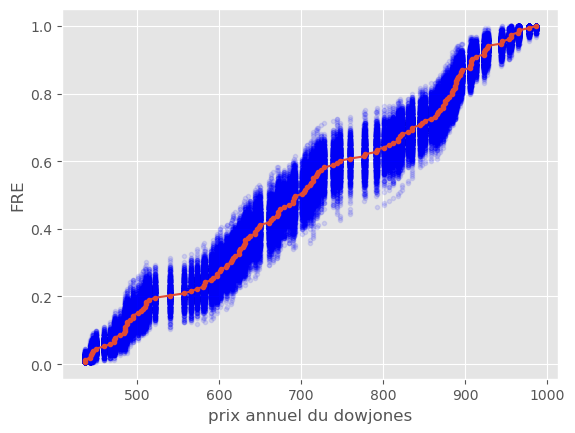

In [156]:
# Echantillon bootstrap (nous allons generer 1000 echantillon Bootstrap de meme taille que notre Dataframe original)

mean_boots = []  # stockage de repartition bootstrap (moyenne)

for i in range(1000):    # la boucle For va nous repeté l'operation 1000 foi
    
    bs_sample = np.random.choice(dowjones_df['Price'], size = len(dowjones_df))    # notre echantillon bootstrap
    
    mean_boots.append(np.mean(bs_sample))    # nous calculons la moyenne de l'echantillon bootstrap
    
    x_boot, y_boot = fre(bs_sample)  # x et y pour la fonction de repartition
    
    _ = plt.plot(x_boot, y_boot, marker = '.', linestyle='none', color='blue', alpha=0.1)   # pour tracer le graphique
    
    # Fonction de repartion des données originelles et nous créons son graphique aussi
    
x, y = fre(dowjones_df['Price'])

_ = plt.plot(x, y, marker = '.')

_ = plt.xlabel("prix annuel du dowjones")

plt.ylabel("FRE")    # fonction de repartion empirique

plt.show()

nous avons en bleu les echantillons bootstrap et en rouge nous avons les données originelles. nous remarquons que les echantillons bootstrap donnent une bonne idées de la distribution des données originelles. par consequelle c'est la meme distribution. nous pouvons calculer à partir de la les intervalles de confiances bootstrap.

## INTERVALLES DE CONFIANCE BOOTSTRAP

In [157]:
# intervalles de confiance à 95% de la moyenne des prix annuel du dowjones (Tres important les intervalles de confiance)

np.percentile(mean_boots, [2.5, 97.5])

# nous sommes sur a 95% que le prix annuel moyen du dowjones se situe entre [683.47253922, 734.78868791]

array([684.76531863, 734.73619118])

In [158]:
np.mean(boots_sample)

# avec cette seul valeur de moyenne obtenu au depart, on ne peut pas mettre une place une strategie a 100% solide
# c'est pour cela il faut un intervalle de confiance a 95% pour que un ingenieur puis faire un travail solide

699.4424836601308

In [159]:
# Fonction pour generer plusieurs replique bootstrap

def compute_boots_repliqs(data, function, size = 1):    # function ICI peu etre la fonction mean ou std (ex: np.std)
                                                         # mettre en paramettre la fonction (ex: np.std ou np.mean  etc)
    boots_repliqs = np.empty(size)
    
    for i in range(size):
        boots_repliqs[i] = function(np.random.choice(data, len(data))) # function ici peu etre la fonction mean ou std 
                                                                      # (ex: np.std ou np.mean  etc)
    return boots_repliqs

In [160]:
# intervalles de confiance à 95% de la moyenne des prix annuel du dowjones

np.percentile(compute_boots_repliqs(dowjones_df['Price'], np.mean, size = 1000), [2.5, 97.5])

# l'intervalle de confiance se rapproche fortement de ce que nous avions precedement. pour obtenir le meme resultat
# il fallait definir un random_state = 120 par exemple

array([683.07088889, 735.26539216])

In [161]:
# intervalles de confiance à 95% de l'Ecart-type des prix annuel du dowjones

np.percentile(compute_boots_repliqs(dowjones_df['Price'], np.std, size = 1000), [2.5, 97.5])

# la fonction nous permet de calculer l'intervalles de confiance de plusieurs paramettre statistique 

array([147.91313026, 169.69530096])

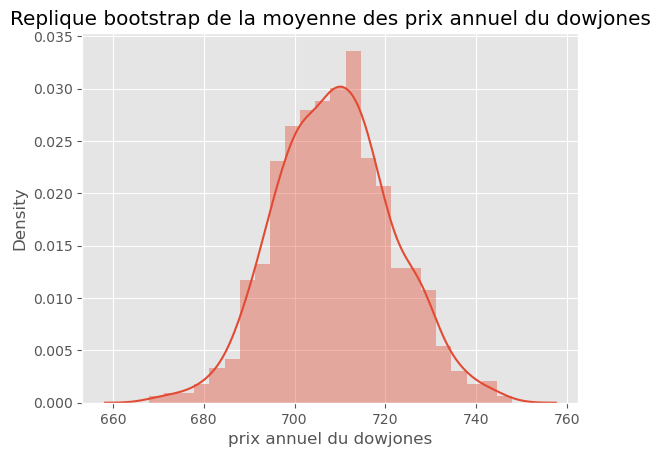

In [162]:
# Densité de probabilité des repliques bootsrap de la moyenne des prix annuel du dowjones

sns.distplot(compute_boots_repliqs(dowjones_df['Price'], np.mean, size = 1000))

plt.xlabel("prix annuel du dowjones")

plt.title("Replique bootstrap de la moyenne des prix annuel du dowjones")

plt.show()   

La distribution des repliques bootstrap de la moyenne des prix du dowjones suis approximativement une loi normal avec une forme en cloche.